In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df=pd.read_csv('removed_zeros.csv')

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

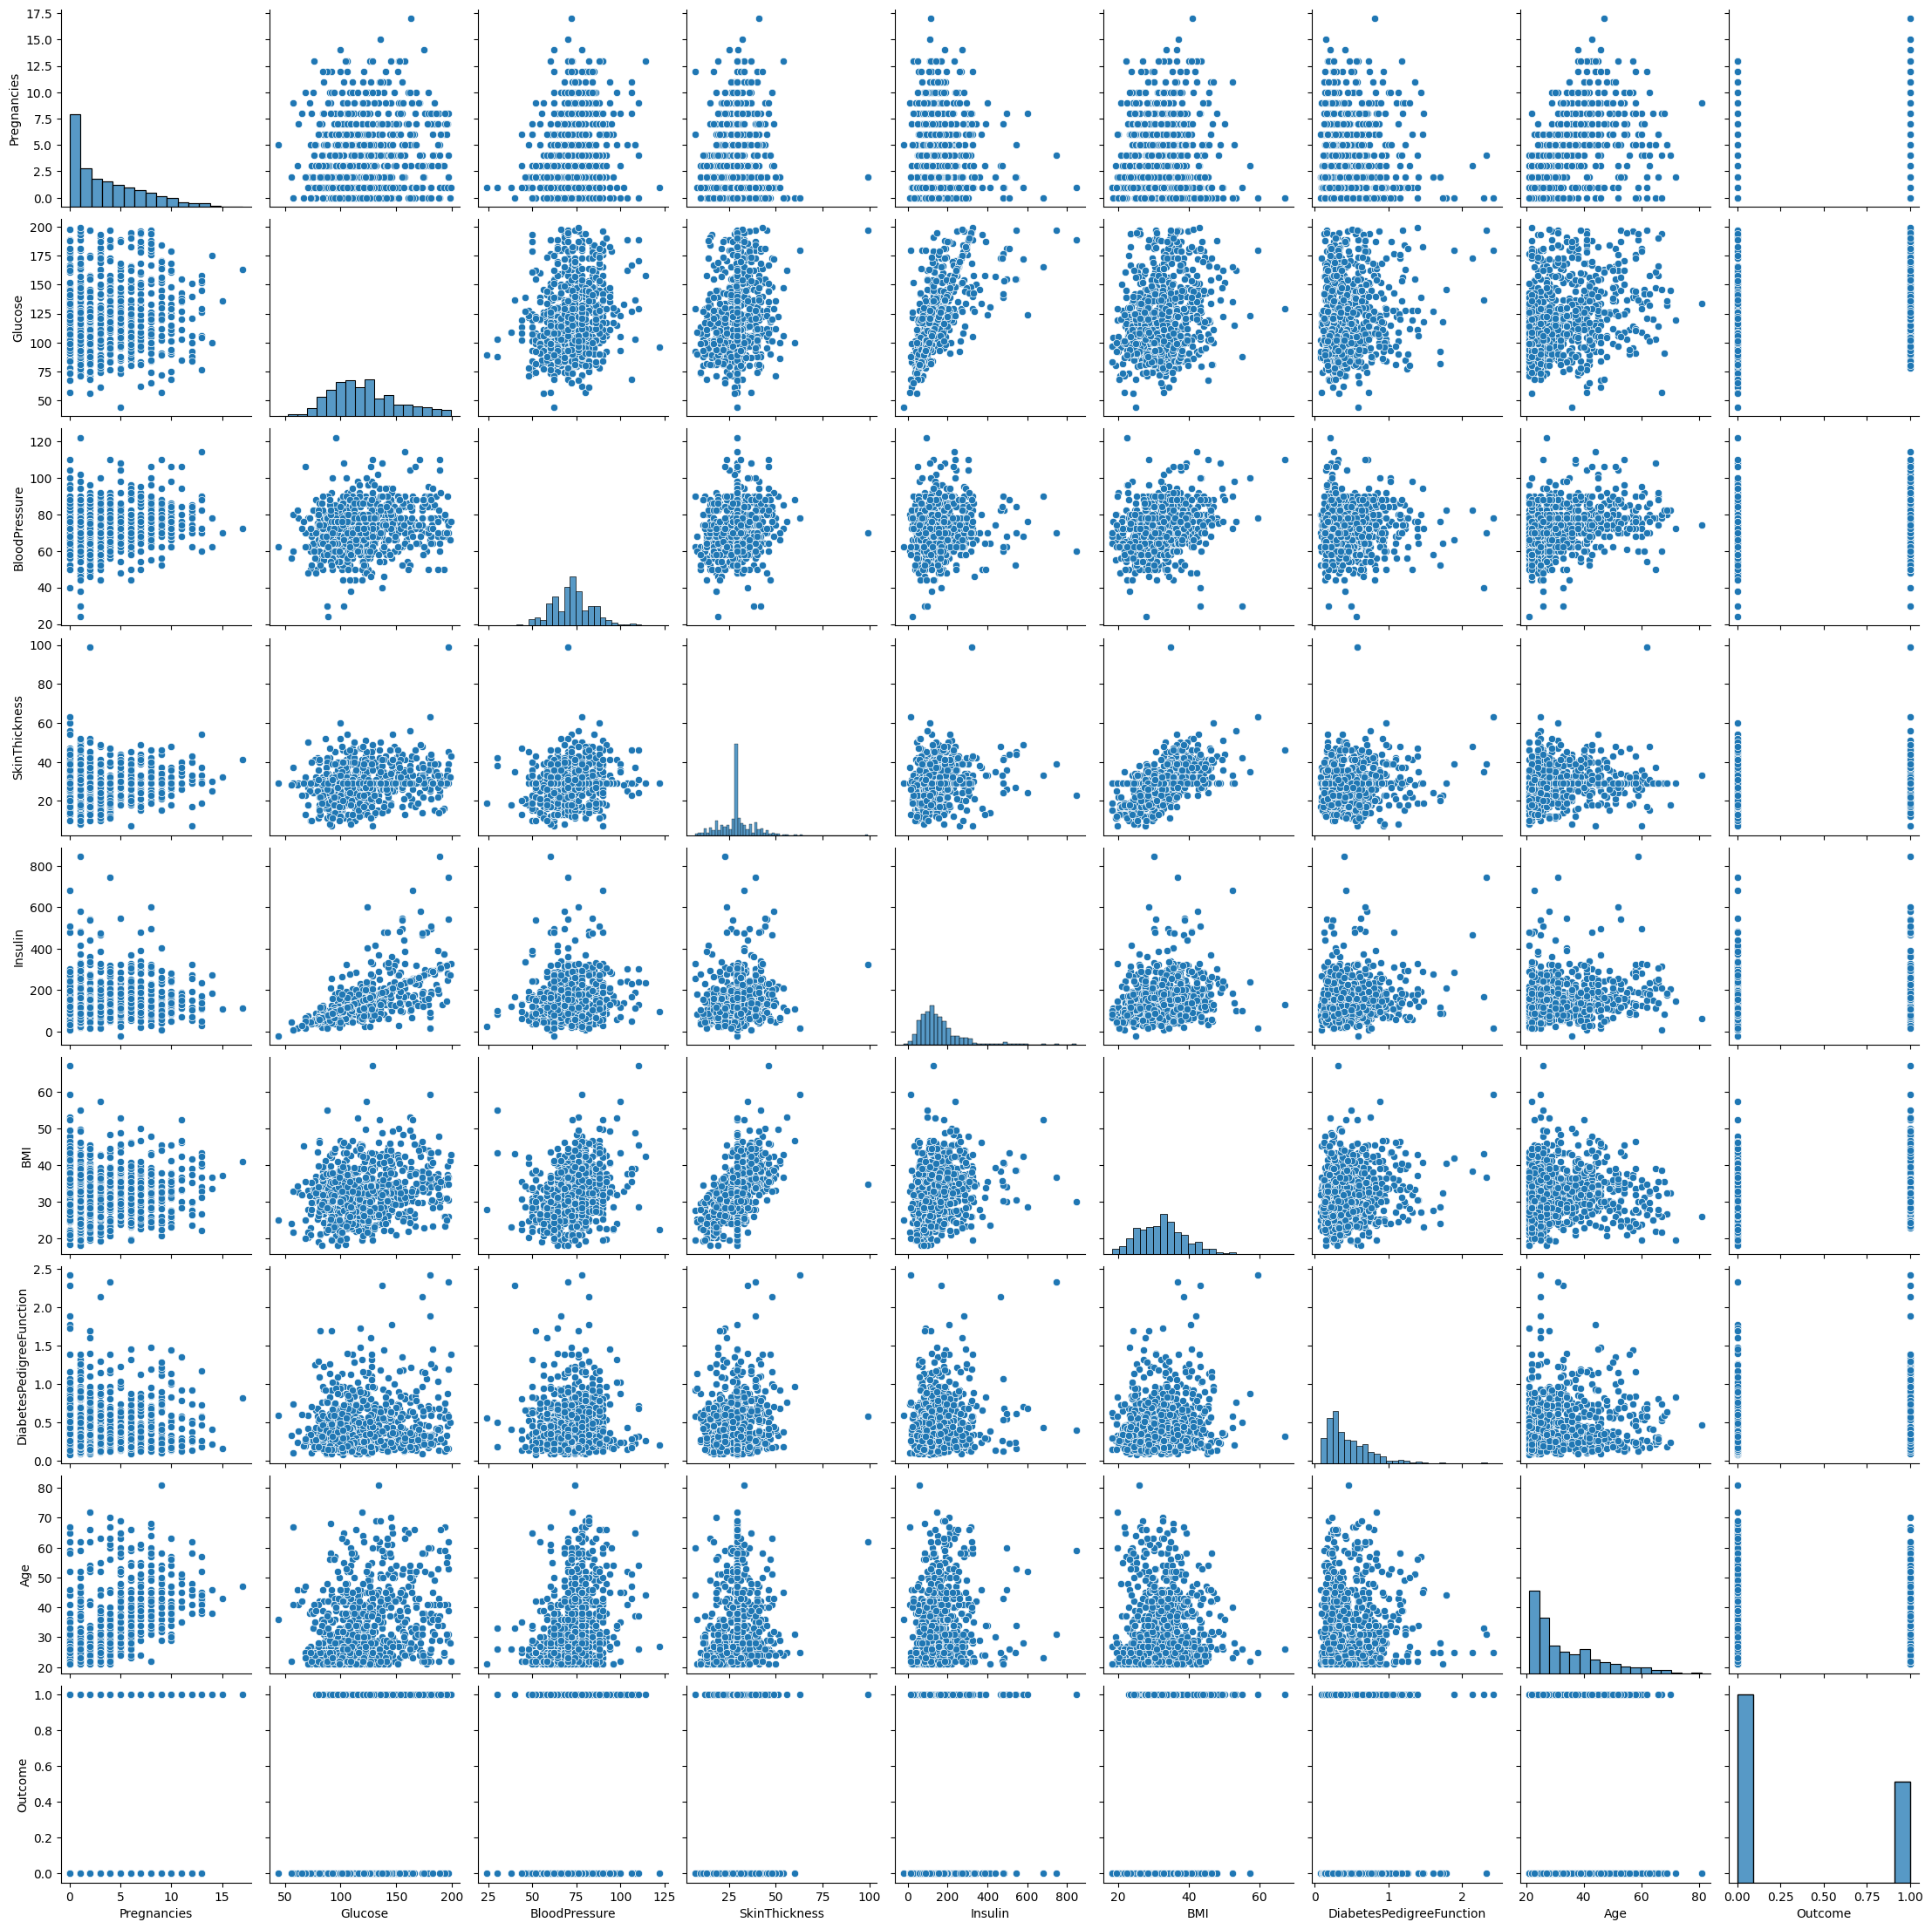

In [4]:
sns.pairplot(df)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Sample Data (replace with your actual dataset)



In [3]:
# Split data into features and target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [8]:
# Define Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters for Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                # Whether bootstrap samples are used when building trees
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154

Confusion Matrix:


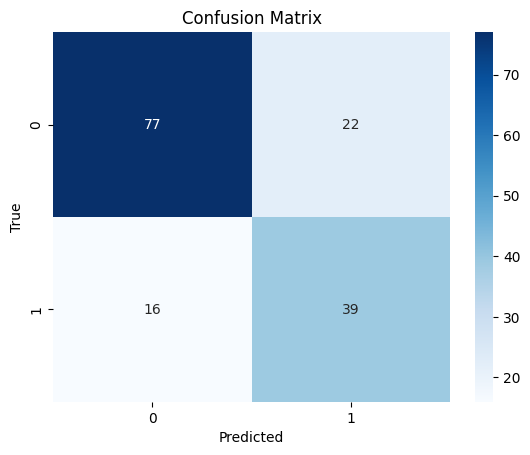

In [9]:
# Get the best estimator
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers you want to tune
models = {
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier()
}

# Define hyperparameters for Grid Search (can be adjusted per model)
param_grids = {
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 150],           # Number of trees in the forest
        'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split a node
        'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
        'bootstrap': [True, False]                # Whether bootstrap samples are used when building trees
    },
    'SVC': {
        'C': [0.1, 1, 10],                         # Regularization parameter
        'kernel': ['linear', 'rbf'],               # Type of kernel
        'gamma': ['scale', 'auto']                 # Kernel coefficient
    },
    'DecisionTreeClassifier': {
        'max_depth': [None, 10, 20],               # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split a node
        'min_samples_leaf': [1, 2, 4]              # Minimum number of samples required to be at a leaf node
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7],                  # Number of neighbors to use
        'weights': ['uniform', 'distance'],        # Weight function used in prediction
        'p': [1, 2]                               # Power parameter for Minkowski distance
    }
}

# Loop over models and perform Grid Search
for model_name, model in models.items():
    print(f"Running Grid Search for {model_name}...\n")
    
    # Set up GridSearchCV for the current model
    grid_search = GridSearchCV(estimator=model, 
                               param_grid=param_grids[model_name], 
                               cv=5, 
                               n_jobs=-1, 
                               verbose=2, 
                               scoring='accuracy')
    
    # Fit GridSearchCV to the data
    grid_search.fit(X_train, y_train)
    
    # Print best parameters and results for the current model
    print(f"Best Hyperparameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Cross-Validation Accuracy for {model_name}: {grid_search.best_score_}\n")
    
    # You can also print the results of all parameter combinations if needed:
    # print(f"Grid Search Results for {model_name}: {grid_search.cv_results_}\n")


Running Grid Search for RandomForestClassifier...

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters for RandomForestClassifier: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy for RandomForestClassifier: 0.7785819005731042

Running Grid Search for SVC...

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy for SVC: 0.7671598027455684

Running Grid Search for DecisionTreeClassifier...

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters for DecisionTreeClassifier: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Validation Accuracy for DecisionTreeClassifier: 0.7263627882180461

Running Grid Search for KNeighborsClassifier...

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Be

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

# Define the classifiers you want to tune
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42),
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis()
}

# Define hyperparameters for Grid Search (can be adjusted per model)
param_grids = {
    'LogisticRegression': {
        'penalty': ['l2'],                     # Regularization type
        'C': [0.1, 1, 10],                     # Regularization strength
        'solver': ['liblinear', 'saga'],       # Optimization algorithm
        'max_iter': [100, 200, 300]            # Maximum number of iterations
    },
    'GradientBoostingClassifier': {
        'n_estimators': [50, 100, 150],       # Number of boosting stages to be run
        'learning_rate': [0.01, 0.1, 0.2],    # Step size shrinking
        'max_depth': [3, 5, 7],                # Maximum depth of the trees
        'subsample': [0.8, 0.9, 1.0],          # Fraction of samples used for fitting each tree
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 150],       # Number of weak learners to train
        'learning_rate': [0.01, 0.1, 1],      # Weight applied to each classifier
    },
    'XGBClassifier': {
        'n_estimators': [50, 100, 150],       # Number of boosting rounds
        'learning_rate': [0.01, 0.1, 0.3],    # Step size
        'max_depth': [3, 5, 7],                # Maximum depth of trees
        'subsample': [0.8, 0.9, 1.0],          # Subsample ratio
        'colsample_bytree': [0.8, 0.9, 1.0],   # Subsample ratio of columns for each tree
        'gamma': [0, 0.1, 0.3]                 # Minimum loss reduction required to make a further partition
    },
    'LinearDiscriminantAnalysis': {
        'solver': ['svd', 'lsqr'],             # Algorithm for fitting the model
        'shrinkage': [None, 'auto'],           # Shrinkage method for regularization
        'priors': [None, 'uniform', 'balanced'] # Class prior probabilities
    }
}

# Loop over models and perform Grid Search
for model_name, model in models.items():
    print(f"Running Grid Search for {model_name}...\n")
    
    # Set up GridSearchCV for the current model
    grid_search = GridSearchCV(estimator=model, 
                               param_grid=param_grids[model_name], 
                               cv=5, 
                               n_jobs=-1, 
                               verbose=2, 
                               scoring='accuracy')
    
    # Fit GridSearchCV to the data
    grid_search.fit(X_train, y_train)
    
    # Print best parameters and results for the current model
    print(f"Best Hyperparameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Cross-Validation Accuracy for {model_name}: {grid_search.best_score_}\n")
    
    # You can also print the results of all parameter combinations if needed:
    # print(f"Grid Search Results for {model_name}: {grid_search.cv_results_}\n")


Running Grid Search for LogisticRegression...

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters for LogisticRegression: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy for LogisticRegression: 0.7622550979608157

Running Grid Search for GradientBoostingClassifier...

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters for GradientBoostingClassifier: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.9}
Best Cross-Validation Accuracy for GradientBoostingClassifier: 0.7752898840463814

Running Grid Search for AdaBoostClassifier...

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Hyperparameters for AdaBoostClassifier: {'learning_rate': 0.1, 'n_estimators': 50}
Best Cross-Validation Accuracy for AdaBoostClassifier: 0.7752632280421164

Running Grid Search for XGBClassifier...

Fitting 5 folds for each of 729 candidates, totalling 3645 fits

c:\Users\ashik\codes\krish\diabetes_prediction\diabetes\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ashik\codes\krish\diabetes_prediction\diabetes\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ashik\codes\krish\diabetes_prediction\diabetes\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\ashik\codes\krish\diabetes_prediction\diabetes\lib\site-pack

___

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Split data into features and target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split the data into training and testing sets (80% training, 20% testing)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
# Specify the number of features to combine (e.g., 2, 3, or any other number)
combination_sizes = [4,5,6,7]

combinations_list = []
for size in combination_sizes:
    combinations_list += list(combinations(X.columns, size))


In [8]:
# Loop through each feature combination
for combo in combinations_list:
    X_combo = X[list(combo)]  # Select the columns in the combination
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_combo, y, test_size=0.3, random_state=42)
    
    # Initialize the logistic regression model
    model = LogisticRegression()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model (you can use accuracy, or other metrics like precision, recall, etc.)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Combination: {combo}, Accuracy: {accuracy:.4f}")


Combination: ('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness'), Accuracy: 0.7273
Combination: ('Pregnancies', 'Glucose', 'BloodPressure', 'Insulin'), Accuracy: 0.7316
Combination: ('Pregnancies', 'Glucose', 'BloodPressure', 'BMI'), Accuracy: 0.7489
Combination: ('Pregnancies', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction'), Accuracy: 0.7403
Combination: ('Pregnancies', 'Glucose', 'BloodPressure', 'Age'), Accuracy: 0.7403
Combination: ('Pregnancies', 'Glucose', 'SkinThickness', 'Insulin'), Accuracy: 0.7229
Combination: ('Pregnancies', 'Glucose', 'SkinThickness', 'BMI'), Accuracy: 0.7532
Combination: ('Pregnancies', 'Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'), Accuracy: 0.7316
Combination: ('Pregnancies', 'Glucose', 'SkinThickness', 'Age'), Accuracy: 0.7359
Combination: ('Pregnancies', 'Glucose', 'Insulin', 'BMI'), Accuracy: 0.7489
Combination: ('Pregnancies', 'Glucose', 'Insulin', 'DiabetesPedigreeFunction'), Accuracy: 0.7489
Combination: ('Pregnancies', 

c:\Users\ashik\codes\krish\diabetes_prediction\diabetes\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ashik\codes\krish\diabetes_prediction\diabetes\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Combination: ('Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age'), Accuracy: 0.7359
Combination: ('Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'), Accuracy: 0.7359
Combination: ('Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'), Accuracy: 0.7359
Combination: ('BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'), Accuracy: 0.7013
Combination: ('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'), Accuracy: 0.7532
Combination: ('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age'), Accuracy: 0.7359
Combination: ('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age'), Accuracy: 0.7316
Combination: ('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age'), Accuracy: 0.7403
Combinati

c:\Users\ashik\codes\krish\diabetes_prediction\diabetes\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ashik\codes\krish\diabetes_prediction\diabetes\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from itertools import combinations

# Loop through each feature combination
for combo in combinations_list:
    X_combo = X[list(combo)]  # Select the columns in the combination
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_combo, y, test_size=0.3, random_state=42)
    
    # Initialize the random forest classifier model
    model = RandomForestClassifier(random_state=42)  # You can adjust parameters here
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model (you can use accuracy, or other metrics like precision, recall, etc.)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Combination: {combo}, Accuracy: {accuracy:.4f}")


Combination: ('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness'), Accuracy: 0.6926
Combination: ('Pregnancies', 'Glucose', 'BloodPressure', 'Insulin'), Accuracy: 0.7056
Combination: ('Pregnancies', 'Glucose', 'BloodPressure', 'BMI'), Accuracy: 0.7446
Combination: ('Pregnancies', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction'), Accuracy: 0.7489
Combination: ('Pregnancies', 'Glucose', 'BloodPressure', 'Age'), Accuracy: 0.7359
Combination: ('Pregnancies', 'Glucose', 'SkinThickness', 'Insulin'), Accuracy: 0.6753
Combination: ('Pregnancies', 'Glucose', 'SkinThickness', 'BMI'), Accuracy: 0.7143
Combination: ('Pregnancies', 'Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'), Accuracy: 0.7316
Combination: ('Pregnancies', 'Glucose', 'SkinThickness', 'Age'), Accuracy: 0.7013
Combination: ('Pregnancies', 'Glucose', 'Insulin', 'BMI'), Accuracy: 0.7013
Combination: ('Pregnancies', 'Glucose', 'Insulin', 'DiabetesPedigreeFunction'), Accuracy: 0.7013
Combination: ('Pregnancies', 

In [11]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from itertools import combinations

# Loop through each feature combination
for combo in combinations_list:
    X_combo = X[list(combo)]  # Select the columns in the combination
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_combo, y, test_size=0.3, random_state=42)
    
    # Initialize the XGBoost classifier model (without the use_label_encoder parameter)
    model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')  # Remove use_label_encoder
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model (you can use accuracy, or other metrics like precision, recall, etc.)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Combination: {combo}, Accuracy: {accuracy:.4f}")


Combination: ('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness'), Accuracy: 0.6623
Combination: ('Pregnancies', 'Glucose', 'BloodPressure', 'Insulin'), Accuracy: 0.7056
Combination: ('Pregnancies', 'Glucose', 'BloodPressure', 'BMI'), Accuracy: 0.7403
Combination: ('Pregnancies', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction'), Accuracy: 0.6970
Combination: ('Pregnancies', 'Glucose', 'BloodPressure', 'Age'), Accuracy: 0.7403
Combination: ('Pregnancies', 'Glucose', 'SkinThickness', 'Insulin'), Accuracy: 0.6580
Combination: ('Pregnancies', 'Glucose', 'SkinThickness', 'BMI'), Accuracy: 0.6840
Combination: ('Pregnancies', 'Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'), Accuracy: 0.7143
Combination: ('Pregnancies', 'Glucose', 'SkinThickness', 'Age'), Accuracy: 0.6450
Combination: ('Pregnancies', 'Glucose', 'Insulin', 'BMI'), Accuracy: 0.7056
Combination: ('Pregnancies', 'Glucose', 'Insulin', 'DiabetesPedigreeFunction'), Accuracy: 0.7013
Combination: ('Pregnancies', 